In [2]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd

In [86]:
import numpy as np

In [11]:
from alpha_vantage.cryptocurrencies import CryptoCurrencies

In [62]:
API_KEY = "SV2R85ROV8KW3LVV"
cc = CryptoCurrencies(key= API_KEY,output_format='pandas')
data, meta_data = cc.get_digital_currency_daily(symbol='IOTA', market='EUR')


In [63]:
data.head()

1a. open (EUR)  1b. open (USD)  2a. high (EUR)  2b. high (USD)  \
date                                                                         
2020-02-16        0.266187          0.2883        0.274128          0.2969   
2020-02-15        0.298318          0.3231        0.300073          0.3250   
2020-02-14        0.297580          0.3223        0.301734          0.3268   
2020-02-13        0.307182          0.3327        0.320847          0.3475   
2020-02-12        0.306628          0.3321        0.327310          0.3545   

            3a. low (EUR)  3b. low (USD)  4a. close (EUR)  4b. close (USD)  \
date                                                                         
2020-02-16       0.261294         0.2830         0.270065           0.2925   
2020-02-15       0.255846         0.2771         0.266187           0.2883   
2020-02-14       0.286223         0.3100         0.298411           0.3232   
2020-02-13       0.286223         0.3100         0.297672           0.3224   
2020-02-12       0.303581         0.3288         0.307182           0.3327   

              5. volume  6. market cap (USD)  
date                                          
2020-02-16   2252367.39           2252367.39  
2020-02-15  20625587.22          20625587.22  
2020-02-14  22777718.94          22777718.94  
2020-02-13  33267115.08          33267115.08  
2020-02-12  33139841.84          33139841.84

In [64]:
meta_data.items()

dict_items([('1. Information', 'Daily Prices and Volumes for Digital Currency'), ('2. Digital Currency Code', 'IOTA'), ('3. Digital Currency Name', 'IOTA'), ('4. Market Code', 'EUR'), ('5. Market Name', 'Euro'), ('6. Last Refreshed', '2020-02-16 00:00:00'), ('7. Time Zone', 'UTC')])

In [65]:
list_of_col = list(data.columns)

In [66]:
data_copy = data.copy()

In [67]:
data_copy.drop([list_of_col[1],list_of_col[3],list_of_col[5],list_of_col[7],list_of_col[9]],axis=1,inplace=True)

In [68]:
data_copy.head()

1a. open (EUR)  2a. high (EUR)  3a. low (EUR)  4a. close (EUR)  \
date                                                                         
2020-02-16        0.266187        0.274128       0.261294         0.270065   
2020-02-15        0.298318        0.300073       0.255846         0.266187   
2020-02-14        0.297580        0.301734       0.286223         0.298411   
2020-02-13        0.307182        0.320847       0.286223         0.297672   
2020-02-12        0.306628        0.327310       0.303581         0.307182   

              5. volume  
date                     
2020-02-16   2252367.39  
2020-02-15  20625587.22  
2020-02-14  22777718.94  
2020-02-13  33267115.08  
2020-02-12  33139841.84

In [69]:
list_of_col = list(data_copy.columns)

(array([736815., 736876., 736938., 736999., 737060., 737119., 737180.,
        737241., 737303., 737364., 737425., 737485.]),
 <a list of 12 Text xticklabel objects>)

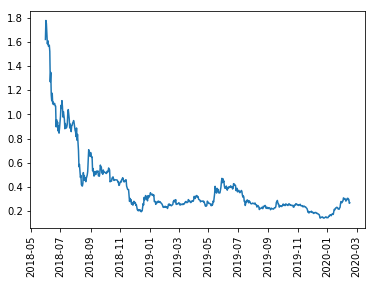

In [70]:
plt.plot(data_copy[list_of_col[3]])
plt.xticks(rotation="vertical")

In [71]:
data_copy.reset_index(inplace=True)
data_copy.set_index("date", inplace=True)

In [72]:
data_copy.head()

1a. open (EUR)  2a. high (EUR)  3a. low (EUR)  4a. close (EUR)  \
date                                                                         
2020-02-16        0.266187        0.274128       0.261294         0.270065   
2020-02-15        0.298318        0.300073       0.255846         0.266187   
2020-02-14        0.297580        0.301734       0.286223         0.298411   
2020-02-13        0.307182        0.320847       0.286223         0.297672   
2020-02-12        0.306628        0.327310       0.303581         0.307182   

              5. volume  
date                     
2020-02-16   2252367.39  
2020-02-15  20625587.22  
2020-02-14  22777718.94  
2020-02-13  33267115.08  
2020-02-12  33139841.84

In [73]:
data_copy.to_csv("IOTA.csv")

In [74]:
df = pd.read_csv("IOTA.csv",parse_dates=True, index_col=0)

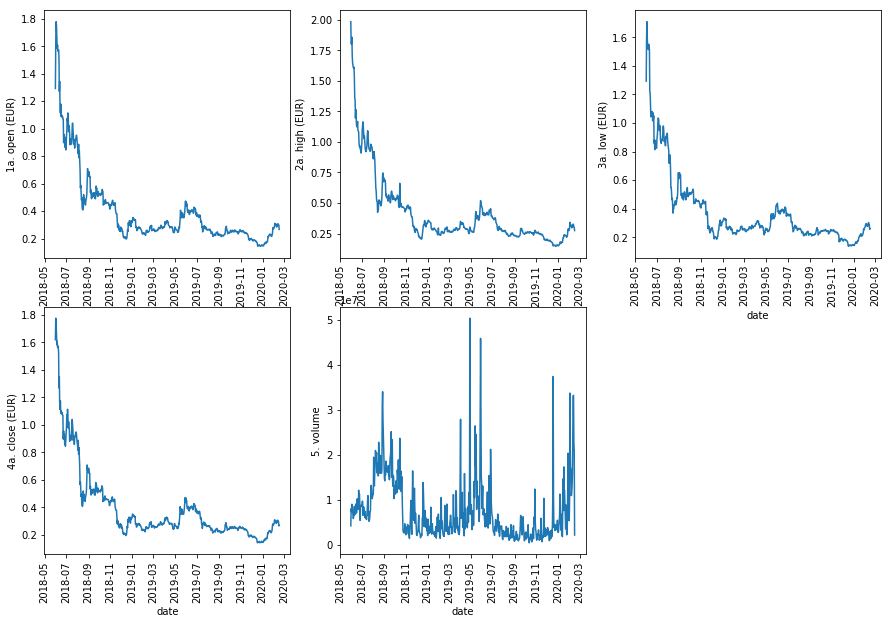

In [75]:
col = list(data_copy.columns)
plt.figure(figsize=(15,10))

for i in range(len(col)):
    
    plt.subplot(2,3,i+1)
    plt.plot(data_copy[col[i]])
    plt.xticks(rotation="vertical")
    plt.ylabel(col[i])
    plt.xlabel("date")

In [81]:
df_close = data_copy.filter([list_of_col[3]])

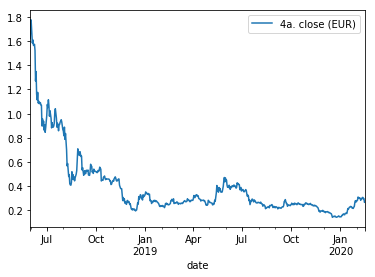

In [82]:
df_close.plot()

In [84]:
dataset = df_close.values

In [89]:
training_data = int(np.ceil(len(dataset)*0.8))

In [92]:
from sklearn.preprocessing import MinMaxScaler

In [93]:
scaler = MinMaxScaler()
train_data=scaler.fit_transform(dataset)

In [97]:
# test train split
train = train_data[0:training_data,:]
x_train = []
y_train = []

for i in range(60,len(train)):
    x_train.append(train[i-60:i,0])
    y_train.append(train[i,0])


In [105]:
#converting x_train y_train to numpy arrays
x_train , y_train = np.array(x_train), np.array(y_train)

In [107]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(442, 60, 1)

In [108]:
import keras

Using TensorFlow backend.


In [114]:
help(keras.layers.LSTM)

Help on class LSTM in module keras.layers.recurrent:

class LSTM(RNN)
 |  LSTM(units, activation='tanh', recurrent_activation='sigmoid', use_bias=True, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', unit_forget_bias=True, kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, recurrent_dropout=0.0, implementation=2, return_sequences=False, return_state=False, go_backwards=False, stateful=False, unroll=False, **kwargs)
 |  
 |  Long Short-Term Memory layer - Hochreiter 1997.
 |  
 |  # Arguments
 |      units: Positive integer, dimensionality of the output space.
 |      activation: Activation function to use
 |          (see [activations](../activations.md)).
 |          Default: hyperbolic tangent (`tanh`).
 |          If you pass `None`, no activation is applied
 |          (ie. "linear" activation: `

In [110]:
model = keras.Sequential()

In [116]:
model.add(keras.layers.LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

In [117]:
model.add(keras.layers.LSTM(50,return_sequences=False))
model.add(keras.layers.Dense(25))
model.add(keras.layers.Dense(1))

In [118]:
model.compile(optimizer=keras.optimizers.adam(0.05),loss=keras.losses.mean_squared_error)

In [124]:
model.fit(x_train,y_train,batch_size=1,epochs=5)

Epoch 1/5
442/442 [==============================] - 19s 43ms/step - loss: 0.0039
Epoch 2/5
442/442 [==============================] - 22s 50ms/step - loss: 0.0040
Epoch 3/5
442/442 [==============================] - 19s 44ms/step - loss: 0.0033
Epoch 4/5
442/442 [==============================] - 20s 45ms/step - loss: 0.0035
Epoch 5/5
442/442 [==============================] - 16s 36ms/step - loss: 0.0033


In [125]:
test_data = train_data[training_data-60:,:]

In [130]:
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [134]:
assert len(x_test)==len(y_test)

In [135]:
x_test = np.array(x_test)

In [136]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [137]:
#Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [140]:
#Get the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

0.5654801932317859

In [167]:
pred = [predictions[i][0] for i in range(predictions.size)]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


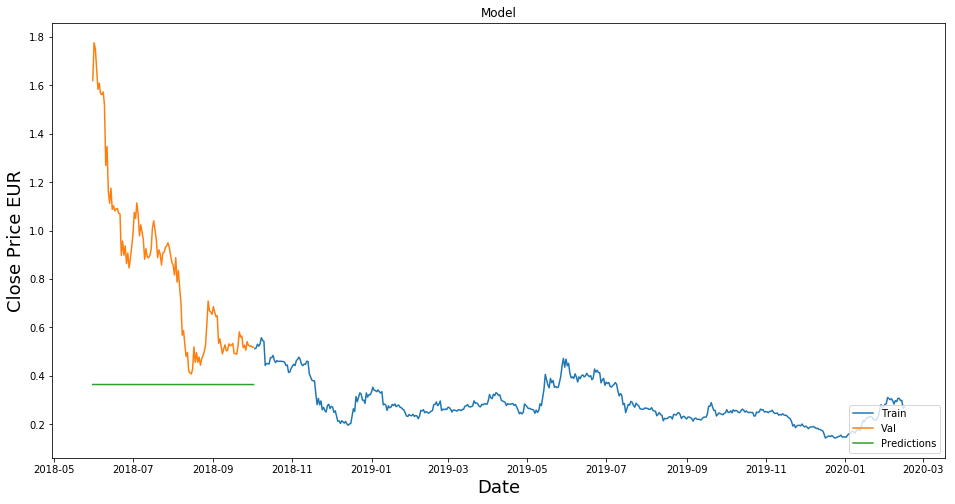

In [177]:
#Plot the data
train = df_close[:training_data]
valid = df_close[training_data:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price EUR', fontsize=18)
plt.plot(train[train.columns[0]])
plt.plot(valid[[valid.columns[0], 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()